In [8]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from datetime import datetime
import pickle, json, sys, os, glob
import tables
import pandas as pd
import matplotlib
from scipy.optimize import curve_fit

def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c
    
pd.set_option('display.max_columns', None)

# Display settings for Jupyter Notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Importing custom utility functions
sys.path.insert(0, os.getcwd() + "/../scripts/")
import auxiliar as aux
import lstpipeline

### Paths to data and results

In [9]:
# Root path of this script
root = os.getcwd() + "/"
# Objects directory
root_objects = root + "objects/"

# Directory of all the night-wise datachecks
root_dchecks = "/fefs/aswg/workspace/abelardo.moralejo/data/datachecks/night_wise/DL1_datacheck_"

# Flags for computing or not different parts
# Compute the datacheck dictionary
compute_datacheck_dict = True

# Create needed folders
for dir in [root_objects]:
    if not os.path.exists(dir):
        os.makedirs(dir)

### Sending jobs with N datachecks to read inside

In [10]:
str_dchecks = "datacheck_"
dl1_root = "/fefs/aswg/data/real/DL1/*/v0.*/tailcut84/"
main_name = f"{str_dchecks}dl1_LST-1.Run?????"
total_dl1a_runwise = np.sort(glob.glob(dl1_root + "*/" + f"{main_name}.h5") + glob.glob(dl1_root + f"{main_name}.h5"))

lengroups = 100
print(f"Amount of jobs is {np.ceil(len(total_dl1a_runwise) / lengroups)}")

njobs = int(np.ceil(len(total_dl1a_runwise) / lengroups))

for n in range(njobs):
    im = n * lengroups
    iM = (n + 1) * lengroups if (n + 1) * lengroups < len(total_dl1a_runwise) else len(total_dl1a_runwise)
    string = f"{im},{iM}"
    
    # !sbatch -p short bash_get_intensities.sh $string

Amount of jobs is 102.0


## Wait for the jobs to finish and then run
#### Putting the information in a unique file

In [11]:
%%time
counts = []
intensity_points = []

files = glob.glob("./objects/tmp/*")

for i, file in enumerate(files):
    print(i, "/", len(files))
    
    with open(file, "rb") as f:
        _data = pickle.load(f)
    _i, _c = _data
    counts = counts + _c
    intensity_points = intensity_points + _i
    

0 / 101
1 / 101
2 / 101
3 / 101
4 / 101
5 / 101
6 / 101
7 / 101
8 / 101
9 / 101
10 / 101
11 / 101
12 / 101
13 / 101
14 / 101
15 / 101
16 / 101
17 / 101
18 / 101
19 / 101
20 / 101
21 / 101
22 / 101
23 / 101
24 / 101
25 / 101
26 / 101
27 / 101
28 / 101
29 / 101
30 / 101
31 / 101
32 / 101
33 / 101
34 / 101
35 / 101
36 / 101
37 / 101
38 / 101
39 / 101
40 / 101
41 / 101
42 / 101
43 / 101
44 / 101
45 / 101
46 / 101
47 / 101
48 / 101
49 / 101
50 / 101
51 / 101
52 / 101
53 / 101
54 / 101
55 / 101
56 / 101
57 / 101
58 / 101
59 / 101
60 / 101
61 / 101
62 / 101
63 / 101
64 / 101
65 / 101
66 / 101
67 / 101
68 / 101
69 / 101
70 / 101
71 / 101
72 / 101
73 / 101
74 / 101
75 / 101
76 / 101
77 / 101
78 / 101
79 / 101
80 / 101
81 / 101
82 / 101
83 / 101
84 / 101
85 / 101
86 / 101
87 / 101
88 / 101
89 / 101
90 / 101
91 / 101
92 / 101
93 / 101
94 / 101
95 / 101
96 / 101
97 / 101
98 / 101
99 / 101
100 / 101
CPU times: user 3min 11s, sys: 42.8 s, total: 3min 54s
Wall time: 4min 32s


In [12]:
str_dchecks = "datacheck_"
dl1_root = "/fefs/aswg/data/real/DL1/*/v0.*/tailcut84/"
main_name = f"{str_dchecks}dl1_LST-1.Run?????"
total_dl1a_runwise = np.sort(glob.glob(dl1_root + "*/" + f"{main_name}.h5") + glob.glob(dl1_root + f"{main_name}.h5"))

tab = tables.open_file(total_dl1a_runwise[0])

binstab = tab.root.dl1datacheck.histogram_binning.col("hist_intensity")[0]
tab.close()

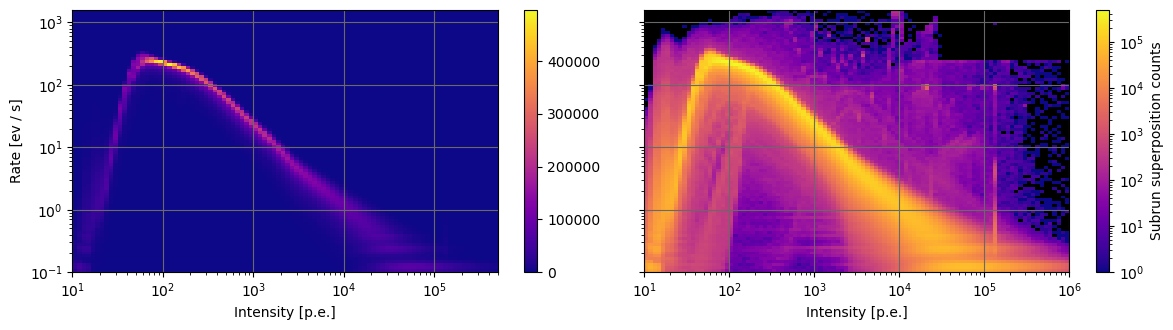

In [13]:
N = 90
bins = (binstab, np.logspace(-1, 3.2, N))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3.4), sharey=True)
hist1 = ax1.hist2d(intensity_points, counts, bins,
                 cmap="plasma")
fig.colorbar(hist1[3],)

hist2 = ax2.hist2d(intensity_points, counts, bins, 
                 norm=matplotlib.colors.LogNorm(),
                 cmap="plasma")
fig.colorbar(hist2[3], label="Subrun superposition counts")

ax1.set_ylabel("Rate [ev / s]")
for ax in [ax1, ax2]:
    ax.set_facecolor("k")
    ax.grid(color="dimgray")
    ax.loglog()
    ax.set_xlabel("Intensity [p.e.]")
ax1.set_xlim(1e1, 5e5)
fig.tight_layout()


# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

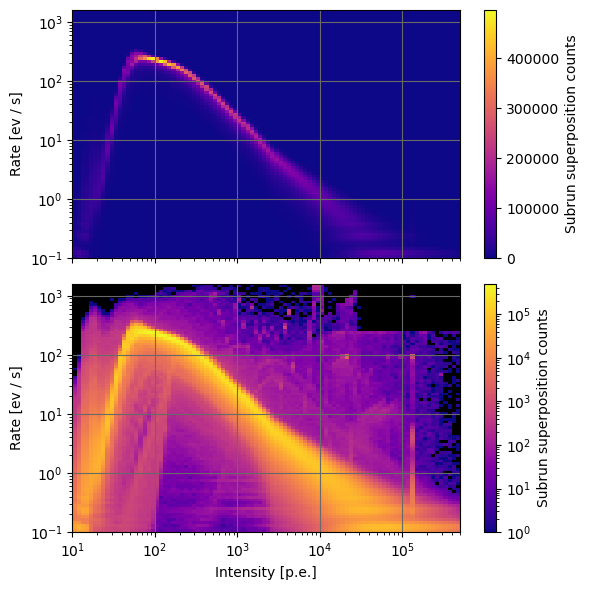

In [14]:
N = 90
bins = (binstab, np.logspace(-1, 3.2, N))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
hist1 = ax1.hist2d(intensity_points, counts, bins,
                 cmap="plasma")
fig.colorbar(hist1[3], label="Subrun superposition counts")

hist2 = ax2.hist2d(intensity_points, counts, bins, 
                 norm=matplotlib.colors.LogNorm(),
                 cmap="plasma")
fig.colorbar(hist2[3], label="Subrun superposition counts")


for ax in [ax1, ax2]:
    ax.set_facecolor("k")
    ax.grid(color="dimgray")
    ax.loglog()
    
    ax.set_ylabel("Rate [ev / s]")
ax1.set_xlim(1e1, 5e5)
ax2.set_xlabel("Intensity [p.e.]")
fig.tight_layout()


plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()